# Python For Calculus

### Authors :  Michal Stolarz, Syed Musharraf Ali
### Based on the notebook of : Santosh Muthireddy and Divin Devaiah

# Requirements
* Numpy
* Sympy
* Matplotlib
* python3


In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

# Slope and Derivatives

In [8]:
#Generate data using linspace

data_x = np.linspace(0,10,100)

x = sp.Symbol('x')
r = sp.Symbol('r')
y = sp.Function(x)

y = 1 / (sp.exp(r)+sp.exp(-(x-4)))
y

1/(exp(r) + exp(4 - x))

In [9]:
y.evalf(subs={x:2,r:3})

0.0363972634351655

In [10]:
y.subs([(x, 4), (r, 1)])

1/(1 + E)

In [11]:
d = [1,2,3]
# g = []
# # g = 2*d
# for i in range(len(d)):
#     g.append(2*d[i])
g = [2*elem for elem in d]
g

[2, 4, 6]

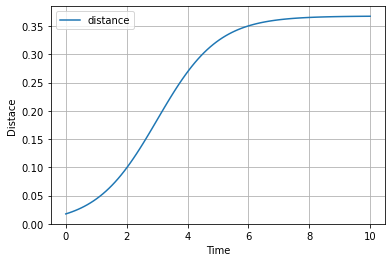

In [15]:
# Substitute x values in y function and plot
data_y = [y.evalf(subs={x:i,r:1}) for i in data_x]

plt.figure()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Distace")
plt.plot(data_x,data_y,label="distance")
plt.legend()
plt.show()

In [16]:
# First order derivative of function y
y_prime_1 = y.diff(x,1)
y_prime_1

exp(4 - x)/(exp(r) + exp(4 - x))**2

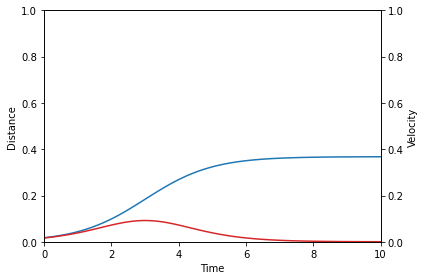

In [18]:
# Substitute values in y_prime and plot
data_y_prime = [y_prime_1.evalf(subs={x:i, r:1}) for i in data_x]

fig, ax1 = plt.subplots()
ax1.plot(data_x,data_y,label = "distance",color="tab:blue")
ax1.set_ylabel("Distance")
ax1.set_xlabel("Time")
ax1.set_ylim(0,1)
ax1.set_xlim(0,10)

# To plot multiple plots in same figure
ax2 = ax1.twinx()

ax2.plot(data_x,data_y_prime,label="velocity",color="tab:red")
ax2.set_ylabel("Velocity")
ax2.set_ylim(0,1)
ax2.set_xlim(0,10)

# automatically adjust subplot params to fit in to the figure area
fig.tight_layout() 

# Derivative of non-linear function

In [19]:
#Generate x data again using linspace 
data_x = np.linspace(0,10,100)

x = sp.Symbol('x')
y = sp.Function(x)

y = x**2
y

x**2

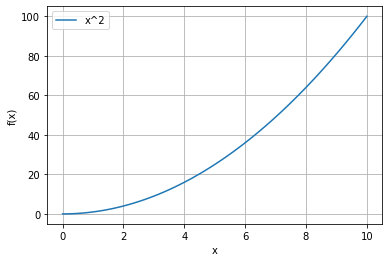

In [20]:
data_y = [y.evalf(subs={x:i}) for i in data_x]

plt.figure()
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(data_x,data_y,label="x^2")
plt.legend()

In [21]:
y_prime = y.diff(x,1)
y_prime

2*x

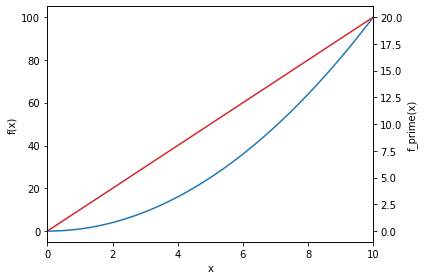

In [22]:
data_y_prime = [y_prime.evalf(subs={x:i}) for i in data_x]

fig, ax1 = plt.subplots()
ax1.plot(data_x,data_y,label = "f(x)",color="tab:blue")
ax1.set_ylabel("f(x)")
ax1.set_xlabel("x")
ax1.set_xlim(0,10)
ax2 = ax1.twinx()
ax2.plot(data_x,data_y_prime,label="f_prime(x)",color="tab:red")
ax2.set_ylabel("f_prime(x)")
ax2.set_xlim(0,10)
fig.tight_layout() 

# Chain Rule

u = Funtion(x)

v = Function(u)

y = Function(v)


$$\frac{d_y}{d_x} =\frac{d_y}{d_v} \frac{d_v}{d_u} \frac{d_u}{d_x} $$


In [23]:
# u = Function(x)
x = sp.Symbol('x')
u = sp.Function(x)
u = x**3
u

x**3

In [24]:
# first order derivative du/dx
dudx = u.diff(x,1)
dudx

3*x**2

In [25]:
# v = Function(u)
u = sp.Symbol('u')
v = sp.Function(u)
v = u**2
v

u**2

In [26]:
# first order derivative dv/du
dvdu = v.diff(u)
dvdu

2*u

In [27]:
# substitute u=x^3
dvdu.subs(u,x**3)

2*x**3

In [28]:
# y = Function(v)
v = sp.Symbol('v')
y = sp.Function(u)
y = v**4
dydv = y.diff(v)
dydv

4*v**3

In [29]:
# Chain rule: dy/dx = dy/dv * dv/du * du/dx
dydx = dudx*dvdu*dydv
dydx

24*u*v**3*x**2

In [30]:
# substitue v = u**2, u=x^3
dydx = dydx.subs(v,u**2)
dydx.subs(u,x**3)

24*x**23

# Higher order derivatives

In [90]:
t = sp.Symbol('t')
distance = sp.Function(t)

distance = t**4
distance

t**4

In [91]:
# First order derivative
velocity = distance.diff(t,1)
velocity

4*t**3

In [92]:
# Second order derivative
acceleration = distance.diff(t,2)
acceleration

12*t**2

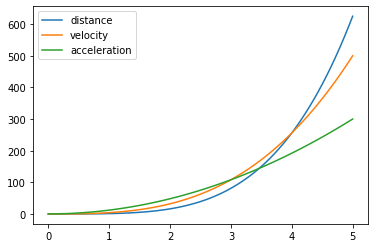

In [93]:
data_t = np.linspace(0,5,100)

distance_subs = [distance.evalf(subs={t:i}) for i in data_t]
velocity_subs = [velocity.evalf(subs={t:i}) for i in data_t]
acceleration_subs = [acceleration.evalf(subs={t:i}) for i in data_t]

plt.plot(data_t,distance_subs,label='distance')
plt.plot(data_t,velocity_subs,label="velocity")
plt.plot(data_t,acceleration_subs,label="acceleration")
plt.legend()
plt.show()

# Integrals

In [31]:
x = sp.Symbol('x')
y = sp.Function(x)

y

x

In [2]:
x = sp.Symbol('x')
y = sp.Function('y')(x)

y

y(x)

In [3]:
data_x = np.linspace(0,10,100)

x = sp.Symbol('x')
y = sp.Function('y')(x)

# derivative of y w.r.t x
y_prime = sp.Derivative(y,x)
y_1 = 1 / (1+sp.exp(-(x-4)))

# y' = e^(4-x)/(1+e^(4-x))^2
eq = y_prime - y_1.diff(x,1)
eq

Derivative(y(x), x) - exp(4 - x)/(exp(4 - x) + 1)**2

In [4]:
# Alternative way of initialising equation

eq1 = sp.Eq(y_prime,y_1.diff(x))
eq1

Eq(Derivative(y(x), x), exp(4 - x)/(exp(4 - x) + 1)**2)

In [35]:
# solve the differential equation
sp.dsolve(eq)

Eq(y(x), C1 - exp(4)/(exp(x) + exp(4)))

In [36]:
# Sloving the integral with intial value
sol = sp.dsolve(eq,ics={y.subs(x,0):0.017986})
sol

Eq(y(x), 0.999999790037908 - exp(4)/(exp(x) + exp(4)))

In [37]:
sp.simplify(sol)

Eq(y(x), (0.999999790037908*exp(x) - 2.09962091601845e-7*exp(4))/(exp(x) + exp(4)))

# Discrete Calculus

more detailed information at http://hplgit.github.io/primer.html/doc/pub/discalc/discalc-readable.html

### Differentiation become Difference. Example: sine function

Consider $f(x) = sin(x)$ and its derivative be $f'(x) = cos(x)$. For $x = 1$, we have $$f'(1) = cos(1) \approx 0.540$$.

The derivative can be approximated by difference for small value of h :

$$f'(x) = \frac{f(x+h) - f(x)}{h}$$

By putting $h = \frac{1}{100}$ we get:

$$f'(1) = \frac{f(1 + \frac{1}{100}) - f(1)}{\frac{1}{100}} = \frac{sin(1.01) - sin(1)}{0.01} \approx 0.536$$


In [38]:
#here is the code for the above calculation

def diff(f, x, h):
    return (f(x+h) - f(x))/float(h)



x = 1
h = 1/10

approx_deriv = diff(np.sin, x, h)
exact = np.cos(x)
print('The approximated value is: ', approx_deriv)
print('The correct value is:      ', exact)
print('The error is:              ', exact - approx_deriv)

The approximated value is:  0.4973637525353891
The correct value is:       0.5403023058681398
The error is:               0.04293855333275065


### Integration becomes Sum. Example: sine function
Suppose we are finding the integral of $sin(x)$ from $x = 0$ to $x = \pi$. So we are computing $\int_0^\pi sin(x) dx$.

We can either compute this integral analytically, i-e

$$
\begin{align*}
\int_0^\pi sin(x) dx = [-cos(x)]_0^\pi = 2
\end{align*}
$$

Or we can compute this integral numerically by summation, i-e we can break this integral in sub-integral and then sum them to get the overall integral.

$$
\begin{align*}
\int_0^\pi sin(x) dx = \sum_{k=0}^{n-1} \int_{x_k}^{x_{k+1}} sin(x) dx
\end{align*}
$$

Let's divide the sum in only four subintervals, therfore $n = 4$.
$$
\begin{align*}
x_0 &= 0 \\
x_1 &= \pi/4 \\
x_2 &= \pi/2 \\
x_3 &= 3\pi/4 \\
x_4 &= \pi
\end{align*}
$$

So now the integral can be approximated by:
$$
\begin{align*}
\int_0^\pi sin(x) dx = \int_{0}^{\pi/4} sin(x) dx +  \int_{\pi/4}^{\pi/2} sin(x) dx +  \int_{\pi/2}^{3\pi/4} sin(x) dx +  \int_{3\pi/4}^{\pi} sin(x) dx
\end{align*}
$$

These subintegrals can be found by area of trapezoid by:

$$
\begin{align*}
 \int_{\pi/4}^{\pi/2} sin(x) dx = \frac{1}{2} (sin(\pi/2) + sin(\pi/4))\ (\pi/2 - \pi/4)
\end{align*}
$$
This can be shown in below plot

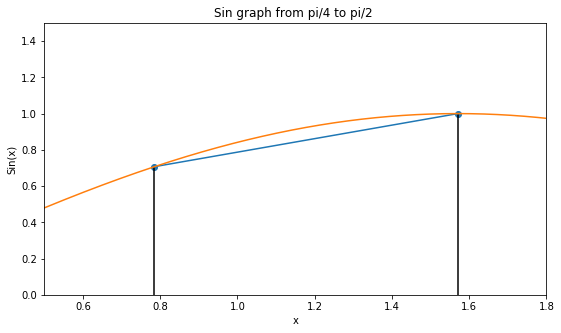

In [27]:
fig, ax = plt.subplots(figsize = (9,5))

# plotting dicrete sinus
ax.scatter([np.pi/4, np.pi/2], [np.sin(np.pi/4),  np.sin(np.pi/2)])

# plotting trapezoid
ax.plot([np.pi/4, np.pi/2], [np.sin(np.pi/4),  np.sin(np.pi/2)])
ax.vlines(np.pi/4,0,np.sin(np.pi/4), color = 'black')
ax.vlines(np.pi/2,0,np.sin(np.pi/2))

# plotting original sinus
ax.plot(np.arange(0.5, 1.8, 0.001), [np.sin(i) for i in np.arange(0.5, 1.8, 0.001)])

# set plotting limits
ax.set_xlim(0.5, 1.8)
ax.set_ylim(0, 1.5)

# visual additives
ax.set_title("Sin graph from pi/4 to pi/2 ")
ax.set_xlabel("x")
ax.set_ylabel("Sin(x)")
plt.show()

Also as we increase the number of subintegrals, we will get a more better approximation. The numerical approximatin of computing a sin integral in a python program is shown below. In this we will start from 4 subintervals then increase the them till 100 to see how the approximation become closer to the real value.


In [140]:
x = np.linspace(0,180,5)
print('x: ',x)
print(x[:-1])
print(x[1:])

x:  [  0.  45.  90. 135. 180.]
[  0.  45.  90. 135.]
[ 45.  90. 135. 180.]


In [28]:
def sin_area(x1, x2):
    x1 = np.deg2rad(x1)
    x2 = np.deg2rad(x2)
    return (np.sin(x2) + np.sin(x1)) * (x2 - x1)/2

print("The analytical sine integral value from 0 to pi")

for num_of_points in [4, 10, 20, 50, 100]:
    x = np.linspace(0,180,num_of_points + 1)

    area_int = 0
    for x1,x2 in zip(x[:-1],x[1:]):
        area_int += sin_area(x1,x2)

    print("The approxmiation of sine integral for {} is {}".format(num_of_points, area_int))

The analytical sine integral value from 0 to pi
The approxmiation of sine integral for 4 is 1.8961188979370398
The approxmiation of sine integral for 10 is 1.9835235375094546
The approxmiation of sine integral for 20 is 1.9958859727087146
The approxmiation of sine integral for 50 is 1.9993419830762615
The approxmiation of sine integral for 100 is 1.999835503887444
